In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20 
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['ytick.major.size'] = 15
mpl.rcParams['xtick.major.size'] = 15

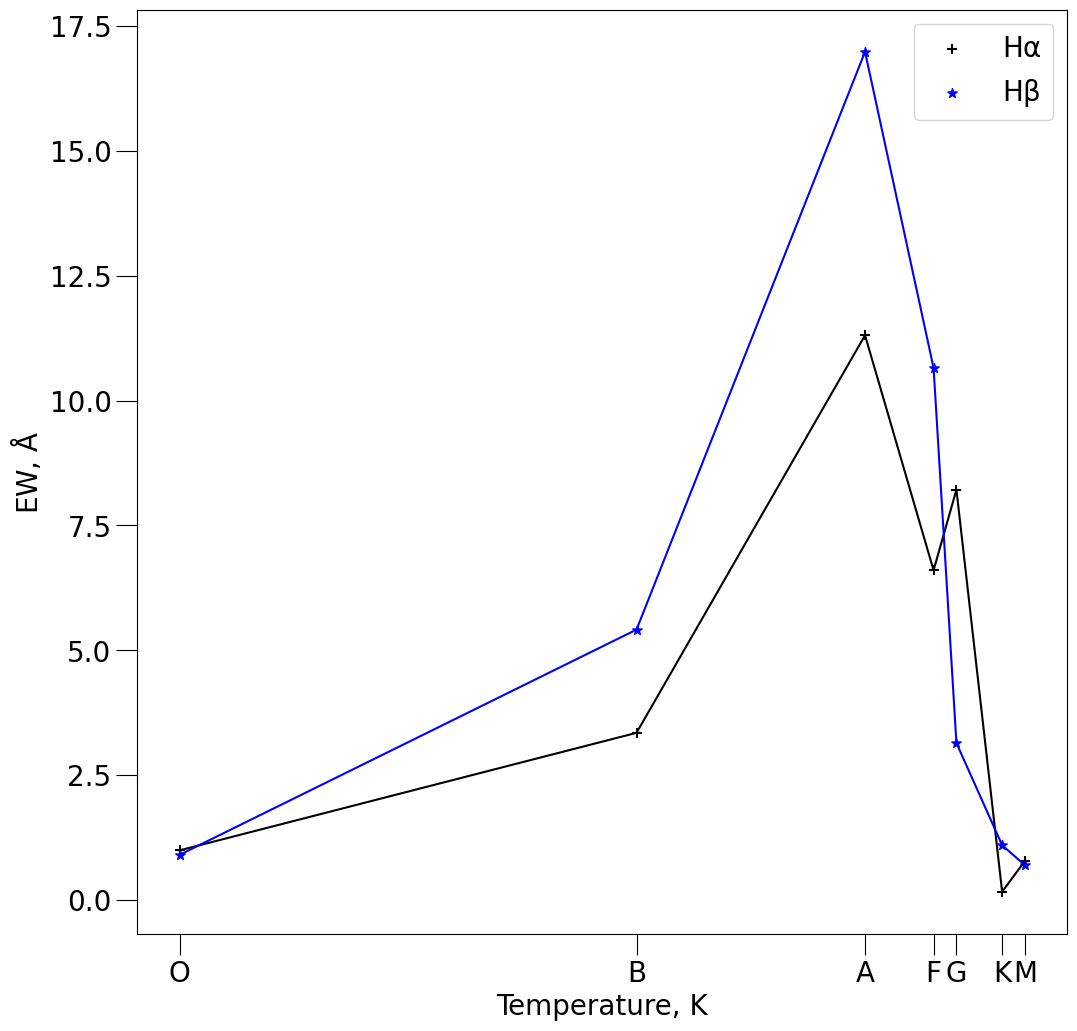

In [38]:
path = r'D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\stars_1\DATA\EW.csv'

df = pd.read_csv(path)

fig, axes = plt.subplots(1, 1, figsize=(12,12))

axes.scatter(df['Temperature'], df['EW_HA'], color='black', marker='+', label=r'$\mathrm{H\alpha}$', s=50)
axes.plot(df['Temperature'], df['EW_HA'], color='black')
axes.scatter(df['Temperature'], df['EW_HB'], color='blue', marker='*', label=r'$\mathrm{H\beta}$', s=50)
axes.plot(df['Temperature'], df['EW_HB'], color='blue')

axes.set_xlabel("Temperature, K")
axes.set_xticks(df["Temperature"], ["" for item in df["Temperature"]])
axes.set_xticklabels(["O", "B", "A", "F", "G", "K", "M"])
axes.set_ylabel(r"EW, $\mathrm{\AA}$")
axes.invert_xaxis()
axes.legend()

<Figure size 1000x600 with 0 Axes>

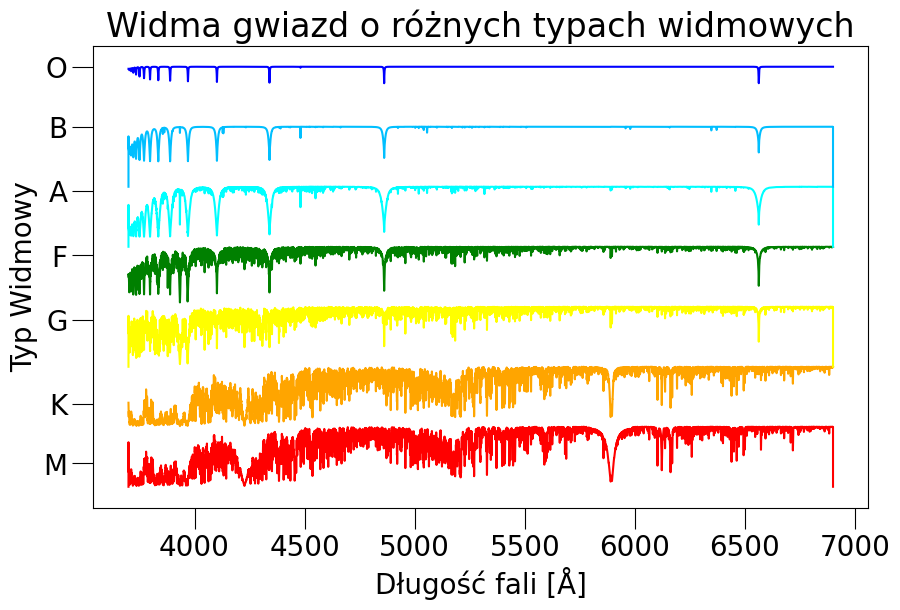

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja plików i przypisanych typów widmowych

path = r"D:\progs\fuzzy-chainsaw\2024_2025\Spectroscopy\stars_1\DATA\stars_zad1/"
files_names = ["star_c.txt", "star_g.txt",  "star_d.txt", "star_b.txt", "star_f.txt", "star_a.txt", "star_e.txt"]
files_names = files_names[::-1]
files = [path + item for item in files_names]
spectral_types = {"star_a": "K", "star_b": "F", "star_c": "O", "star_d": "A", "star_e": "M", "star_f": "G", "star_g": "B"}

# Kolory dla różnych typów widmowych
colors = {"O": "blue", "B": "deepskyblue", "A": "cyan", "F": "green", "G": "yellow", "K": "orange", "M": "red"}

plt.figure(figsize=(10, 6))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Lista typów widmowych do oznaczenia na prawej osi Y
types_y = []
positions = []  # Lista pozycji dla typów widmowych

for i, file in enumerate(files):
    # Wczytanie danych
    data = np.loadtxt(file)
    wavelength = data[:, 0]  # Długość fali w A
    depth = data[:, 1]       # Głębokość widma
    
    # Pobranie typu widmowego i przypisanie koloru
    star_name = files_names[i].split('.')[0]
    # plt.axline(i, linestyle='dotted')
    spectral_type = spectral_types[star_name]
    color = colors.get(spectral_type, "black")
    
    # Rysowanie widma z przesunięciem, gdzie kontinuum jest na poziomie i
    ax.plot(wavelength, i + depth, color=color)
    types_y.append(spectral_type)
    positions.append(np.percentile(i + depth, 16))  # Zapamiętanie pozycji

ax.set_xlabel("Długość fali [Å]")
ax.set_ylabel("Typ Widmowy")
ax.set_yticks(positions, ["" for _ in positions])  # Pusta lewa oś Y
# ax2 = plt.gca().twinx()
# ax2.set_yticks(positions)  # Prawa oś Y z typami widmowymi
ax.set_yticklabels(types_y)
plt.title("Widma gwiazd o różnych typach widmowych")
plt.show()